# Guliford_Data_Model_building


In [1]:
#Import all the necessary libraries
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns 
from io import StringIO
import nltk
import re
import time
import gensim 
from gensim import corpora, models, similarities
from keras.models import Sequential
from keras.layers.recurrent import LSTM,SimpleRNN
import nltk
from nltk.corpus import stopwords 
import pickle
from keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

E:\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


# Setting Working directory

In [2]:
#os.chdir("D:/VINODKUMAR/NLP CLASSIFICATION PROJECT/SHASTER-2/SHASTER")
os.chdir("E:/AV")

In [3]:
actual_data=pd.read_csv("new_Guliford_data.csv",header=0)

In [4]:
actual_data.head()

,Unnamed: 0,FileID,clientid,PID,SUMMARY,DATA,Categories1,Sub_categories1,Previous_Appointment,pre_data
0,0,92824,1004,1.750262e+15,NaN,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,Call from Patient Summary of Call Some better ...
1,1,92825,1004,1.583836e+15,recurrent chest wall pain pneumonia symptoms,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,SYMPTOMS,No,Call from Patient Initial call taken by Ravisa...
2,2,92826,1004,1.583837e+15,NaN,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,Call from Patient Initial call taken by John M...
3,3,92827,1004,1.583837e+15,NaN,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,Call from Patient Summary of Call Needs someth...
4,4,92828,1004,1.583837e+15,NaN,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,Call from Patient Initial call taken by John M...


# Exploring Column names 

In [4]:
actual_data.columns

Index(['Unnamed: 0', 'FileID', 'clientid', 'PID', 'SUMMARY', 'DATA',
       'Categories1', 'Sub_categories1', 'Previous_Appointment', 'pre_data'],
      dtype='object')

# Removing Unneccessory columns 

In [5]:
# Removing Unneccessory columns 
actual_data.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
actual_data1=actual_data[['SUMMARY', 'pre_data','Categories1','Sub_categories1','Previous_Appointment']]

In [7]:
actual_data1.head()

,SUMMARY,pre_data,Categories1,Sub_categories1,Previous_Appointment
0,NaN,Call from Patient Summary of Call Some better ...,ASK_A_DOCTOR,MEDICATION RELATED,No
1,recurrent chest wall pain pneumonia symptoms,Call from Patient Initial call taken by Ravisa...,ASK_A_DOCTOR,SYMPTOMS,No
2,NaN,Call from Patient Initial call taken by John M...,ASK_A_DOCTOR,MEDICATION RELATED,No
3,NaN,Call from Patient Summary of Call Needs someth...,PRESCRIPTION,REFILL,No
4,NaN,Call from Patient Initial call taken by John M...,PRESCRIPTION,REFILL,No


# renaming column names

In [8]:
# Changing the column names
col_names=["summary","data","categories","sub_categories","appointment"]
actual_data1.columns=col_names

# Checking for null values 

In [9]:
null_columns=actual_data1.columns[actual_data1.isnull().any()]

In [10]:
actual_data1[null_columns].isnull().sum()

summary    2823
data         11
dtype: int64

In [11]:
#Percentage of missing values in each column 
actual_data1.apply(lambda x: sum(x.isnull())/len(actual_data1),axis=0)

summary           0.032615
data              0.000127
categories        0.000000
sub_categories    0.000000
appointment       0.000000
dtype: float64

In [12]:
#collecting all null values in a data frame 
nulls_summary = actual_data1[actual_data1.summary.isnull()]
len(nulls_summary)

2823

In [14]:
nulls_summary.head()

,summary,data,categories,sub_categories,appointment
0,NaN,Call from Patient Summary of Call Some better ...,ASK_A_DOCTOR,MEDICATION RELATED,No
2,NaN,Call from Patient Initial call taken by John M...,ASK_A_DOCTOR,MEDICATION RELATED,No
3,NaN,Call from Patient Summary of Call Needs someth...,PRESCRIPTION,REFILL,No
4,NaN,Call from Patient Initial call taken by John M...,PRESCRIPTION,REFILL,No
5,NaN,Call from Patient Caller Mom Initial call take...,ASK_A_DOCTOR,MEDICATION RELATED,No


In [13]:
nulls_data = actual_data1[actual_data1.data.isnull()]
len(nulls_data)

11

In [14]:
nulls_summary.head(11)

,summary,data,categories,sub_categories,appointment
0,NaN,Call from Patient Summary of Call Some better ...,ASK_A_DOCTOR,MEDICATION RELATED,No
2,NaN,Call from Patient Initial call taken by John M...,ASK_A_DOCTOR,MEDICATION RELATED,No
3,NaN,Call from Patient Summary of Call Needs someth...,PRESCRIPTION,REFILL,No
4,NaN,Call from Patient Initial call taken by John M...,PRESCRIPTION,REFILL,No
5,NaN,Call from Patient Caller Mom Initial call take...,ASK_A_DOCTOR,MEDICATION RELATED,No
6,NaN,Call from Patient Summary of Call called x ov...,ASK_A_DOCTOR,MEDICATION RELATED,No
7,NaN,Call from Patient Initial call taken by John M...,ASK_A_DOCTOR,MEDICATION RELATED,No
8,NaN,Call from Patient Summary of Call Pt is out of...,PRESCRIPTION,PRIOR AUTHORIZATION,No
9,NaN,Call from Patient Caller Patient Initial call ...,ASK_A_DOCTOR,MEDICATION RELATED,No
10,NaN,Call from Patient Caller Daughter Initial call...,ASK_A_DOCTOR,MEDICATION RELATED,No


# Handling missing values

In [17]:
#to drop the NANs
# replacing na values with None word
# actual_data1 =actual_data1.where((pd.notnull(actual_data1)), null)
#actual_data.dropna(axis = 0,how = 'any',inplace=True)

# Converting to Lower Case and Upper Case 

In [15]:
#Converting to lower case
actual_data1['summary'] = actual_data1['summary'].astype(str).str.lower()
actual_data1["data"] = actual_data1["data"].astype(str).str.lower()
actual_data1["categories"] = actual_data1["categories"].map(lambda x: x.upper())
actual_data1["sub_categories"] = actual_data1["sub_categories"].map(lambda x: x.upper())
actual_data1["appointment"] = actual_data1["appointment"].map(lambda x: x.upper())

# Converting data types

In [16]:
#Converting datatype of summary feature
actual_data1.summary =actual_data1.summary.astype('str')
#Converting datatype of data feature
actual_data1.data =actual_data1.data.astype('str')
#Converting datatype of category feature
actual_data1.categories=actual_data1.categories.astype("category")
#Converting datatype of sub_categories feature
actual_data1.sub_categories=actual_data1.sub_categories.astype("category")
#Converting datatype of appointment feature
actual_data1.appointment=actual_data1.appointment.astype("category")

# Fequency count of target columns 

In [17]:
#Categoreies coulumn levels count 
actual_data1.categories.value_counts()

ASK_A_DOCTOR     31337
PRESCRIPTION     21490
APPOINTMENTS     19477
MISCELLANEOUS    10848
LAB               3402
Name: categories, dtype: int64

In [18]:
#Categoreies coulumn levels count 
actual_data1.sub_categories.value_counts()

MEDICATION RELATED                               27191
NEW APPOINTMENT                                  17459
REFILL                                           17369
OTHERS                                            5109
SYMPTOMS                                          4147
CHANGE OF PROVIDER                                3048
LAB RESULTS                                       2453
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)     2447
PROVIDER                                          2297
QUERIES FROM PHARMACY                             1113
RESCHEDULING                                       865
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)         817
QUERY ON CURRENT APPOINTMENT                       697
PRIOR AUTHORIZATION                                647
CANCELLATION                                       584
CHANGE OF HOSPITAL                                 176
FOLLOW UP ON PREVIOUS REQUEST                       64
CHANGE OF PHARMACY                                  60
QUERIES FR

# Removing punctuations in train data

In [19]:
#2.2 Removing Punctuation
actual_data1['data'] = actual_data1['data'].str.replace('[^\w\s\d\*\\b]','')
actual_data1['summary'] = actual_data1['summary'].str.replace('[^\w\s\d\*\\b]','')  

In [20]:
freq_count_data = pd.Series(' '.join(actual_data1['data']).split()).value_counts()
freq_count_summary = pd.Series(' '.join(actual_data1['summary']).split()).value_counts()
print(freq_count_data,freq_count_summary)

call             383092
to               255527
by               203390
patient          182333
and              180422
of               143248
for              140415
up               126993
pm               122869
she              114866
am               111964
the              107807
follow           106879
details          106013
a                102128
followup          98583
taken             97546
from              93214
i                 89375
at                86867
mg                84910
is                82885
summary           81527
back              81500
initial           79961
in                79107
cma               78177
he                75316
md                74718
new               71840
                  ...  
metroplol             1
alarvert              1
yest                  1
producitive           1
mucinexnd             1
adviseing             1
turks                 1
netiher               1
ddo                   1
gip                   1
rousvastatin    

In [21]:
print(len(freq_count_data),len(freq_count_summary))
print(len(set(freq_count_data)),len(set(freq_count_summary)))

42106 15355
1594 392


In [38]:
pd.DataFrame(freq_count_summary).to_csv('Guliford_Data_word_frequency_summary_col.csv')
pd.DataFrame(freq_count_data).to_csv('Guliford_Data_word_frequency_data_col.csv')

In [22]:
#1.1 Number of Words
#One of the most basic features we can extract is the number of words in each sentence.
actual_data1['word_count'] = actual_data1['data'].apply(lambda x: len(str(x).split(" ")))
actual_data1[['data','word_count']].head(10)

,data,word_count
0,call from patient summary of call some better ...,214
1,call from patient initial call taken by ravisa...,88
2,call from patient initial call taken by john m...,219
3,call from patient summary of call needs someth...,85
4,call from patient initial call taken by john m...,145
5,call from patient caller mom initial call take...,151
6,call from patient summary of call called x ov...,53
7,call from patient initial call taken by john m...,264
8,call from patient summary of call pt is out of...,207
9,call from patient caller patient initial call ...,201


In [40]:
actual_data1.word_count.describe()

count    86554.000000
mean       199.752767
std         86.150341
min          1.000000
25%        129.000000
50%        187.000000
75%        267.000000
max        680.000000
Name: word_count, dtype: float64

In [23]:
#One of the most basic features we can extract is the number of words in each sentence.
actual_data1['unique_word_count'] = actual_data1['data'].apply(lambda x: len(set(str(x).split(" "))))
actual_data1[['data','word_count','unique_word_count']].head(10)

,data,word_count,unique_word_count
0,call from patient summary of call some better ...,214,73
1,call from patient initial call taken by ravisa...,88,50
2,call from patient initial call taken by john m...,219,54
3,call from patient summary of call needs someth...,85,27
4,call from patient initial call taken by john m...,145,47
5,call from patient caller mom initial call take...,151,95
6,call from patient summary of call called x ov...,53,39
7,call from patient initial call taken by john m...,264,130
8,call from patient summary of call pt is out of...,207,119
9,call from patient caller patient initial call ...,201,60


In [42]:
actual_data1.unique_word_count.describe()

count    86554.000000
mean        74.468112
std         27.822826
min          1.000000
25%         53.000000
50%         72.000000
75%         92.000000
max        170.000000
Name: unique_word_count, dtype: float64

In [25]:
plt.figure()
plt.boxplot(actual_data1.unique_word_count)

AttributeError: 'DataFrame' object has no attribute 'unique_word_count'

# Handling speling errors

In [25]:
#Replacing spelling errors 
import re
def replacing_text(input_text):
    letters_only = re.sub("[^a-zA-Z]", " ",input_text )
    low_case = letters_only.lower()
    input_text   =re.sub('pt ', ' patient ', low_case)
    input_text1  =re.sub(' appt ', ' appointment ',  input_text)
    input_text1  =re.sub(' appt ', ' appointment ',  input_text)
    input_text2  =re.sub(' ov ', ' office visit ',  input_text1)
    input_text3  =re.sub(' schd ', ' scheduled ',  input_text2)
    input_text4  =re.sub(' np ', ' new patient ',  input_text3)
    input_text5  =re.sub(' r/s ', ' reschedule ',  input_text4)
    input_text6  =re.sub(' med ', ' medication ',  input_text5)
    input_text7  =re.sub(' pa ', ' prior authorization ',  input_text6)
    input_text8  =re.sub(' fin ', ' financial ',  input_text7)
    input_text9  =re.sub(' dept ', ' department ',  input_text8) 
    input_text10 =re.sub(' Call patient back ', ' ', input_text9)
    input_text11 =re.sub(' Phone Note ', ' ', input_text10)
    input_text12 =re.sub(' caller name ', ' ', input_text11)
    input_text13 =re.sub(' call Taken by ', ' ', input_text12)
    input_text14 =re.sub(' cell Phone ', ' ', input_text13)
    input_text15 =re.sub(' call from patient  ', ' ', input_text14)
    input_text16 =re.sub(' call patient back at ', ' ', input_text15)
    input_text17 =re.sub(' additional follow-up details ', ' ', input_text16)
    input_text18 =re.sub(' follow-up details ', ' ', input_text17)
    input_text19 =re.sub(' additional follow-up by ', ' ', input_text18)
    input_text20 =re.sub(' follow-up by ', ' ', input_text19)
    input_text21 =re.sub(' default paragraph ', ' ', input_text20)
    input_text22 =re.sub(' default paragraph ', ' ', input_text21)
    input_text23 =re.sub(' pm ', '  ', input_text22)
    input_text24 =re.sub(' tabs ', ' tablets ', input_text23)
    input_text25 =re.sub(' ph ',' phone ', input_text24)
    input_text26 =re.sub(' dr ',' doctor ',input_text25)
    input_text27 =re.sub(' msg ',' message ', input_text26)
    input_text28 =re.sub(' sched ',' scheduled ', input_text27)
    input_text29 =re.sub(' yrly ',' yearly ', input_text28)
    input_text30 =re.sub('xxx ',' ',input_text29)
    input_text31 =re.sub(' clld ', ' called ', input_text30)
    input_text32 =re.sub(' rs ',' reschedule ',input_text31)
    input_text33 =re.sub(' appt', ' appointment ',  input_text32)
    input_text34 =re.sub(' rn ', ' relay neurology ', input_text33)
    input_text35 =re.sub(' ad ', ' add ', input_text34)
    input_text36 =re.sub(' new medications ', ' add ', input_text35)
    input_text37 =re.sub(' summary of call ', ' ', input_text36)
    input_text38 =re.sub('summary of call',' ',input_text37)
    input_text39 =re.sub(' am ', ' ', input_text38)
    return(input_text39)   

In [27]:
length_data=len(actual_data1)

In [28]:
start = time.time()
data_process2=[]
for i in range (0,length_data):
    if i%10000 == 0:
        print ("no.of rows reviews processed:",i)
    data_process2.append(replacing_text(actual_data1.data[i]))
    
print("Training took {:0.3f} seconds".format(time.time()-start))

no.of rows reviews processed: 0
no.of rows reviews processed: 10000
no.of rows reviews processed: 20000
no.of rows reviews processed: 30000
no.of rows reviews processed: 40000
no.of rows reviews processed: 50000
no.of rows reviews processed: 60000
no.of rows reviews processed: 70000
no.of rows reviews processed: 80000
Training took 27.227 seconds


In [29]:
start = time.time()
summary_process2=[]
for i in range (0,length_data):
    if i%10000 == 0:
        print ("no.of rows reviews processed:",i)
    summary_process2.append(replacing_text(actual_data1.summary[i]))
print("Training took {:0.3f} seconds".format(time.time()-start))

no.of rows reviews processed: 0
no.of rows reviews processed: 10000
no.of rows reviews processed: 20000
no.of rows reviews processed: 30000
no.of rows reviews processed: 40000
no.of rows reviews processed: 50000
no.of rows reviews processed: 60000
no.of rows reviews processed: 70000
no.of rows reviews processed: 80000
Training took 9.292 seconds


In [31]:
actual_data1.data=pd.DataFrame(data_process2)
actual_data1.summary=pd.DataFrame(summary_process2)

# Handling Stop words

In [34]:
#counting stop words in a sentence
stop = stopwords.words('english')
actual_data1['stopwords'] = actual_data1['data'].apply(lambda x: len([x for x in x.split() if x  in stop]))
actual_data1[['data','stopwords']].head(10)

,data,stopwords
0,call from patient some better c cough and cong...,35
1,call from patient initial call taken by ravisa...,14
2,call from patient initial call taken by john m...,9
3,call from patient needs something stronger for...,4
4,call from patient initial call taken by john m...,13
5,call from patient caller mom initial call take...,51
6,call from patient called x over weekend with ...,10
7,call from patient initial call taken by john m...,88
8,call from patient patient is out of testoster...,106
9,call from patient caller patient initial call ...,15


In [35]:
sum(actual_data1.stopwords)/len(actual_data1.stopwords)

38.089735887422883

In [36]:
actual_data1.stopwords.describe()

count    86554.000000
mean        38.089736
std         25.047335
min          0.000000
25%         20.000000
50%         32.000000
75%         50.000000
max        180.000000
Name: stopwords, dtype: float64

In [37]:
#Removal of Stop Words
#from nltk.corpus import stopwords
stop = stopwords.words('english')
actual_data1['data'] = actual_data1['data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(actual_data1['data'].head())

actual_data1['summary'] = actual_data1['summary'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(actual_data1['summary'].head())

0    call patient better c cough congestion however...
1    call patient initial call taken ravisankar r a...
2    call patient initial call taken john russo md ...
3    call patient needs something stronger cough ot...
4    call patient initial call taken john russo md ...
Name: data, dtype: object
0                                             nan
1    recurrent chest wall pain pneumonia symptoms
2                                             nan
3                                             nan
4                                             nan
Name: summary, dtype: object


In [38]:
print(stop[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all']


In [39]:
#2.3 Removal of Stop Words
stop2 = ['phone','patient','please','would','may','caller','x','by','r','c','a','m','mom','is','from','ravisankar','home','initial','taken','john','follow','details','detail','followup','pm','jones','come','going','still','erica','weaver','ma','rt','md','called','russo','must','iii','http','great','add','also','like','ok', 'okay','pt','call','january','february','march','april','may','june','july','august','september','october','november','december']
actual_data1['data'] = actual_data1['data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop2))
actual_data1['summary'] = actual_data1['summary'].apply(lambda x: " ".join(x for x in x.split() if x not in stop2))

In [40]:
actual_data1['data'] [:10]

0    better cough congestion however low grade feve...
1    avva recurrent pneumonia symptoms chest wall p...
2    today st cough congestion head congestion feve...
3    needs something stronger cough otcs tessalon b...
4    get refill rx moxiflox mg days bronchitis coug...
5    episodes absence sz acivity w per doctor penam...
6    weekend continued colitis type issues profuse ...
7    tonight sugars terrible hrs samples upped rece...
8    testosterone says working wants fill states wa...
9    wk really bad cough chest tightness mucinex ro...
Name: data, dtype: object

In [41]:
freq_count_pre_process_data = pd.Series(' '.join(actual_data1['data']).split()).value_counts()
freq_count_pre_process_summary = pd.Series(' '.join(actual_data1['summary']).split()).value_counts()

In [42]:
print(len(freq_count_pre_process_data),len(freq_count_pre_process_summary))
print(len(set(freq_count_pre_process_data)),len(set(freq_count_pre_process_summary)))

41867 12811
1436 338


In [43]:
pd.DataFrame(freq_count_pre_process_summary).to_csv('Guliford_Data_word_frequency_pre_process_summary_col.csv')
pd.DataFrame(freq_count_pre_process_data).to_csv('Guliford_Data_word_frequency_pre_process_data_col.csv')

In [61]:
#2.4 Common word removal
#We can also remove commonly occurring words from our text data First, 
#let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.
freq_data = pd.Series(' '.join(actual_data1['data']).split()).value_counts()[:10]
print(freq_data)

freq_summary = pd.Series(' '.join(actual_data1['summary']).split()).value_counts()[:10]
print(freq_summary)

need      58827
day       54294
rx        39460
one       38596
tablet    37062
daili     36013
said      34565
notifi    32668
want      32035
get       29977
dtype: int64
need        4600
request     3617
med         3463
nan         2824
question    2471
answer      2359
referr      2342
lab         2267
order       2068
appoint     1931
dtype: int64


In [62]:
#removing commonly occurring words
freq_data_l = list(freq_data.index)
actual_data1['data'] = actual_data1['data'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_data_l))
actual_data1['data'].head()


freq_summary_l = list(freq_summary.index)
actual_data1['summary'] = actual_data1['summary'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_summary_l))
actual_data1['summary'].head()

0                                       
1    recurr chest wall pneumonia symptom
2                                       
3                                       
4                                       
Name: summary, dtype: object

In [46]:
#2.5 Rare words removal
#Remove rarely occurring words from the text. Because they’re so rare, 
#the association between them and other words is dominated by noise. 
#You can replace rare words with a more general form and then this will have higher counts

freq_rare_data = pd.Series(' '.join(actual_data1['data']).split()).value_counts()[-10:]
print(freq_rare_data)


freq_rare_summary = pd.Series(' '.join(actual_data1['summary']).split()).value_counts()[-10:]
print(freq_rare_summary)

lifesource      1
swine           1
cholorseptic    1
capsular        1
attempt         1
heimlich        1
hutton          1
ilness          1
alprzolam       1
exceded         1
dtype: int64
perinihydrocodone    1
pecystdone           1
arbs                 1
todayprinted         1
nervesprinted        1
pflurazepam          1
tartrate             1
densityp             1
labsanswered         1
methocabamal         1
dtype: int64


In [47]:
freq_rare_data_l = list(freq_rare_data.index)
actual_data1['data'] = actual_data1['data'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_rare_data_l))
print(actual_data1['data'].head())

freq_rare_summary_l = list(freq_rare_summary.index)
actual_data1['summary'] = actual_data1['summary'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_rare_summary_l))
print(actual_data1['summary'].head())

0    better cough congestion however low grade feve...
1    avva recurrent pneumonia symptoms chest wall p...
2    today st cough congestion head congestion feve...
3    needs something stronger cough otcs tessalon b...
4    get refill rx moxiflox days bronchitis cough c...
Name: data, dtype: object
0                                        nan
1    recurrent chest wall pneumonia symptoms
2                                        nan
3                                        nan
4                                        nan
Name: summary, dtype: object


In [63]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
actual_data1['data'] = actual_data1['data'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
actual_data1['summary'] = actual_data1['summary'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [64]:
actual_data1.head()

,summary,data,categories,sub_categories,appointment,word_count,unique_word_count,stopwords
0,,better cough congest howev low grade fever sle...,ASK_A_DOCTOR,MEDICATION RELATED,NO,214,73,35
1,recurr chest wall pneumonia symptom,avva recurr pneumonia symptom chest wall pain ...,ASK_A_DOCTOR,SYMPTOMS,NO,88,50,14
2,,today st cough congest head congest fever seve...,ASK_A_DOCTOR,MEDICATION RELATED,NO,219,54,9
3,,someth stronger cough otc tessalon benzonat ca...,PRESCRIPTION,REFILL,NO,85,27,4
4,,refil moxiflox bronchiti cough congest sputum ...,PRESCRIPTION,REFILL,NO,145,47,13


In [72]:
actual_data1.to_csv("actual_data1.csv")

In [65]:
train_data=actual_data1
#test_data=actual_data1[50000:]

In [66]:
train_data.shape

(86554, 8)

In [156]:
#test_data.shape

In [51]:
#train_data_x=train_data[['summary','data']]

In [79]:
#train_data_y=train_data[['categories']]

In [80]:
#test_data_x=test_data[['summary','data']]

In [81]:
#test_data_y=test_data[['categories']]

In [67]:
#doing TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_data_vectorizer = TfidfVectorizer(ngram_range=(1,2),norm="l2",max_features= 3000)
tfidf_data = tfidf_data_vectorizer.fit_transform(train_data["data"])

In [68]:
dense_data = tfidf_data.todense()

In [69]:
print(dense_data.shape)

(86554, 3000)


In [70]:
tfidf_data.shape

(86554, 3000)

In [71]:
tfidf_summary_vectorizer = TfidfVectorizer(ngram_range=(1,2),norm="l2",max_features= 1000)
tfidf_summary = tfidf_summary_vectorizer.fit_transform(train_data["summary"])

In [72]:
dense_summary = tfidf_summary.todense()

In [73]:
print(dense_summary.shape)

(86554, 1000)


In [74]:
feature_names_data = tfidf_data_vectorizer.get_feature_names()
print(len(feature_names_data))
print(feature_names_data[:1000])

3000
['ab', 'abd', 'abd pain', 'abdomen', 'abdomin', 'abdomin pain', 'abl', 'abnorm', 'abx', 'abx sent', 'accid', 'accu', 'accu chek', 'acet', 'acetaminophen', 'acetaminophen hydrocodon', 'acetaminophen mouth', 'acetaminophen po', 'acetonid', 'acetonid appli', 'acetonid ext', 'ach', 'achi', 'acid', 'act', 'act inh', 'act nasal', 'action', 'action ap', 'action complet', 'action fwd', 'action inform', 'action melissa', 'action sampl', 'action tisha', 'activ', 'actual', 'acut', 'acyclovir', 'ad', 'adder', 'adder amphetamin', 'adder xr', 'addit', 'address', 'adjust', 'administ', 'admit', 'advair', 'advanc', 'advi', 'advi action', 'advi amanda', 'advi ap', 'advi check', 'advi could', 'advi go', 'advi kelli', 'advi melissa', 'advi see', 'advi send', 'advi sent', 'advi shanon', 'advi today', 'advic', 'advil', 'aepb', 'aer', 'aer albuterol', 'aerosol', 'affect', 'affect area', 'affect eye', 'afford', 'afib', 'afraid', 'afternoon', 'age', 'ago', 'agr', 'agreeabl', 'agreeabl ami', 'agreeabl ap',

In [75]:
feature_names_summary = tfidf_summary_vectorizer.get_feature_names()
print(len(feature_names_summary))
print(feature_names_summary[:1000])

1000
['ab', 'abd', 'abdomen', 'abdomin', 'abx', 'accid', 'ach', 'achi', 'acid', 'ad', 'adder', 'adderr', 'addit', 'adher', 'admit', 'advi', 'ahc', 'aid', 'al', 'allerg', 'allergi', 'alprazolam', 'alreadi', 'altern', 'ambien', 'ami', 'amlodipin', 'androgel', 'ankl', 'ankl swell', 'annual', 'anoth', 'antibiot', 'anxieti', 'anyth', 'ape', 'app', 'appetit', 'approv', 'appt', 'area', 'arm', 'arthriti', 'asa', 'asap', 'ask', 'assist', 'asthma', 'ativan', 'atorvastatin', 'attack', 'auth', 'author', 'av', 'avva', 'await', 'awar', 'away', 'back', 'back req', 'bad', 'bayada', 'bed', 'benicar', 'better', 'bg', 'bid', 'bite', 'bjh', 'black', 'bladder', 'bleed', 'blister', 'bloat', 'blood', 'blood pressur', 'blood stool', 'blood sugar', 'blood urin', 'bm', 'bodi', 'bodi ach', 'boil', 'bone', 'bowel', 'bp', 'bp elev', 'bp high', 'bp medic', 'bp read', 'bp readingsdon', 'brand', 'breast', 'breath', 'bring', 'brittani', 'broken', 'bronchiti', 'brui', 'bs', 'bug', 'bump', 'burn', 'busi', 'buttock', 'by

In [76]:
df_data = pd.DataFrame(dense_data)
df_summary = pd.DataFrame(dense_summary)

In [77]:
col_names2 =[]
for i in range (3000,4000):
    col_names2.append(i)

In [78]:
df_summary.columns=col_names2

In [79]:
preprocessed_data=pd.concat([df_data,df_summary],axis=1)

In [80]:
preprocessed_data.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999],
           dtype='int64', length=4000)

In [81]:
x_train = preprocessed_data
y_train= train_data.categories
y_train2= train_data.sub_categories
#y_train2=actual_data1.sub_categories
y_train3=actual_data1.appointment

In [82]:
start = time.time()
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

print("Training took {:0.3f} seconds".format(time.time()-start))

Training took 24.453 seconds


In [86]:
X_train.shape

(69243, 4000)

In [100]:
Y_train= np.array(Y_train)

In [101]:
Y_train

array(['ASK_A_DOCTOR', 'PRESCRIPTION', 'ASK_A_DOCTOR', ..., 'APPOINTMENTS',
       'LAB', 'ASK_A_DOCTOR'], dtype=object)

In [172]:
#import matplotlib.pyplot as plt
#plt.plot(X_train)

In [117]:
X_train = np.array(X_train)

In [83]:
import time
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [109]:
from keras.models import Sequential
from keras.layers import Dense

In [110]:
model = Sequential()

In [125]:
model.add(Dense(units=100,input_dim = 4000,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=5,kernel_initializer='uniform',activation='sigmoid'))

In [126]:
#compiling the ANN
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [127]:
model.fit(X_train,Y_train,batch_size=32,epochs=20)

ValueError: Error when checking target: expected dense_21 to have shape (None, 5) but got array with shape (69243, 1)

In [174]:
start = time.time()
model_random = RandomForestClassifier(n_estimators = 1000,n_jobs = -1,random_state =1,max_features = "auto",max_depth=30 ,min_samples_leaf = 50)
model_fit = model_random.fit(X_train,Y_train)
print("Training took {:0.3f} seconds".format(time.time()-start))

Training took 260.641 seconds


In [175]:
pred_test = model_fit.predict(X_test)
pred_test

array(['APPOINTMENTS', 'ASK_A_DOCTOR', 'APPOINTMENTS', ...,
       'PRESCRIPTION', 'ASK_A_DOCTOR', 'ASK_A_DOCTOR'], dtype=object)

# CONFUSION MATRIX
     #Accuracy : the proportion of the total number of predictions that were correct. 
     #Positive Predictive Value or Precision : the proportion of positive cases that were correctly identified.
     #Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
     #Specificity : the proportion of actual negative cases which are correctly identified.
     #Negative Predictive Value : the proportion of negative cases that were correctly identified.

In [176]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,precision_recall_curve,roc_curve,confusion_matrix
print(accuracy_score(Y_test,pred_test))

0.7124371786725203


In [118]:
print(classification_report(Y_test,pred_test))

               precision    recall  f1-score   support

 APPOINTMENTS       0.83      0.86      0.84      3883
 ASK_A_DOCTOR       0.63      0.86      0.73      6247
          LAB       0.98      0.42      0.58       689
MISCELLANEOUS       0.79      0.40      0.53      2198
 PRESCRIPTION       0.86      0.68      0.76      4294

  avg / total       0.77      0.74      0.73     17311



In [119]:
len(Y_test)

17311

In [120]:
Y_test.value_counts()

ASK_A_DOCTOR     6247
PRESCRIPTION     4294
APPOINTMENTS     3883
MISCELLANEOUS    2198
LAB               689
Name: categories, dtype: int64

In [121]:
from nltk import ConfusionMatrix

In [122]:
ConfusionMatrix(list(Y_test), list(pred_test))

<ConfusionMatrix: 12811/17311 correct>

In [123]:
print(ConfusionMatrix(list(Y_test), list(pred_test)))

              |                   M      |
              |    A    A         I    P |
              |    P    S         S    R |
              |    P    K         C    E |
              |    O    _         E    S |
              |    I    A         L    C |
              |    N    _         L    R |
              |    T    D         A    I |
              |    M    O         N    P |
              |    E    C         E    T |
              |    N    T    L    O    I |
              |    T    O    A    U    O |
              |    S    R    B    S    N |
--------------+--------------------------+
 APPOINTMENTS |<3328> 514    1   24   16 |
 ASK_A_DOCTOR |  427<5389>   3   97  331 |
          LAB |   33  319 <286>  43    8 |
MISCELLANEOUS |  173 1032    3 <888> 102 |
 PRESCRIPTION |   45 1256    .   73<2920>|
--------------+--------------------------+
(row = reference; col = test)



In [129]:
X_train.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999],
           dtype='int64', length=4000)

In [125]:
predictions_RF_SUB=pd.DataFrame(pred_test)

In [162]:
#predictions_RF_SUB.to_csv("predictions_RF_SUB.csv")

In [164]:
#Y_test.to_csv("Y_test.csv")

In [126]:
import matplotlib.pyplot as plt

In [133]:
importances = model_random.feature_importances_
indices = np.argsort(importances)

Text(0.5,0,'Relative Importance')

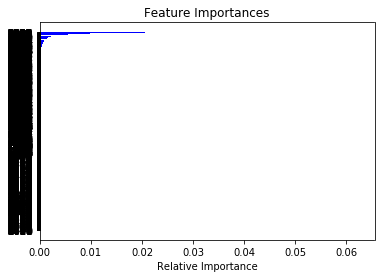

In [134]:
features=X_train.columns
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')